> **Basic Models**

시퀀스-투-시퀀스 모델은 프랑스어 문장을 영어로 번역하거나 이미지를 캡션으로 설명하는 작업에 활용된다. 인코더 네트워크는 입력된 문장이나 이미지를 벡터로 변환하고, 디코더 네트워크는 이를 바탕으로 번역이나 캡션을 생성한다. 충분한 훈련 데이터를 제공하면, 이 모델은 번역 및 이미지 캡션 생성에서 성능이 우수하다. 이러한 구조는 이미지 설명과 같은 다양한 작업에도 적용 가능하다.

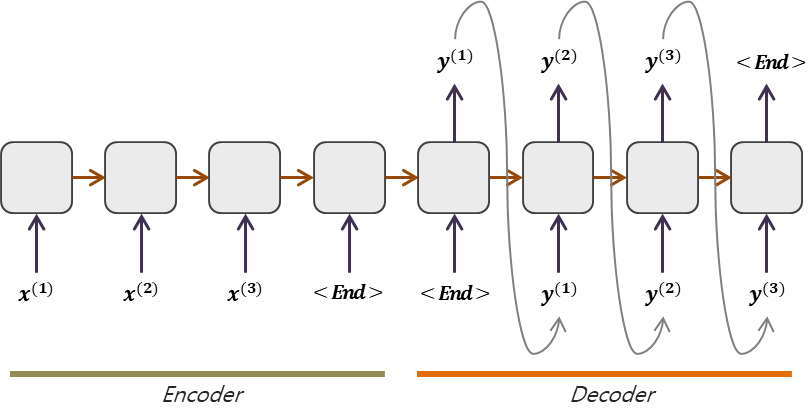

> **Picking the most likely sentence**

시퀀스-투-시퀀스 모델을 이용한 기계 번역은 조건부 언어 모델로 생각할 수 있으며, 입력된 문장에 대해 가장 적합한 번역을 찾는 문제이다. 언어 모델과 달리, 무작위로 문장을 생성하지 않고, 입력 문장에 조건화된 가장 가능성 높은 번역을 찾아야 한다. 이를 위해 그리디 탐색은 전체 문장의 최적화에 적합하지 않으며, 단어 단위로 가장 가능성 높은 단어를 선택하는 방식은 부적절할 수 있다. 대신, 번역에서 여러 가능성을 고려할 수 있는 빔 탐색과 같은 근사적 탐색 알고리즘이 자주 사용된다. 이 알고리즘은 완벽한 최적해를 보장하지 않지만, 대부분 충분히 좋은 번역을 찾는다.

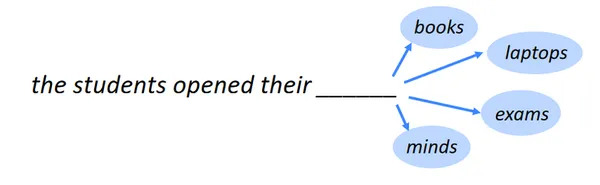

> **Beam Search**


빔 서치는 기계 번역이나 음성 인식에서 가장 가능성이 높은 번역이나 텍스트를 생성하는 데 사용되는 알고리즘이다. 빔 서치는 그리디 서치와 달리, 여러 가능성을 동시에 고려하며, 빔 너비(B)로 선택할 후보 수를 설정한다. 예를 들어, 첫 단어로 가장 가능성 높은 세 단어를 선택하고, 이후 각 단어에 대해 두 번째 단어를 계산하며, 확률을 곱해 전체 문장의 가능성을 계산한다. 각 단계에서 30,000개의 후보 중 가장 가능성 높은 세 개를 선택하며, 이를 반복하여 최종 번역을 생성한다. 빔 너비가 크면 더 좋은 번역을 찾을 확률이 높아진다.

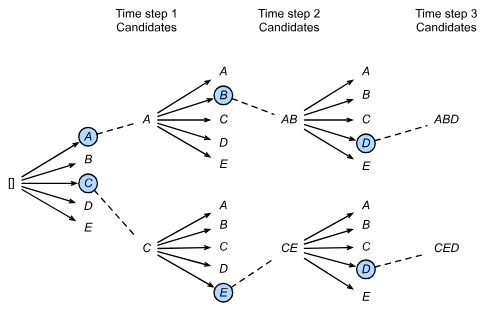

> **Refinements to Beam Search**

빔 서치는 기계 번역과 같은 작업에서 가장 가능성 높은 출력을 선택하기 위한 알고리즘으로, 그리디 서치와 달리 여러 가능성을 동시에 고려한다. 로그 확률을 사용하는 것은 수치적 안정성을 높이고, 긴 문장이 짧은 문장보다 낮은 확률을 가질 수 있는 문제를 해결하기 위해 문장의 길이를 기준으로 정규화한다. 길이 정규화는 단어 수로 나누거나, α라는 파라미터를 적용해 조정할 수 있다. 빔 너비(beam width)가 크면 더 나은 결과를 얻을 수 있지만, 속도와 메모리 사용량이 증가한다. 일반적으로 빔 너비가 작으면 속도는 빠르지만 정확도는 떨어지며, 빔 너비를 10 정도로 설정하는 것이 보통이다. 빔 서치는 빠르지만 항상 최적의 결과를 보장하지 않는다.

> **Error analysis in beam search**

빔 서치는 근사적인 탐색 알고리즘으로 항상 최적의 번역을 제공하지 않으며, 빔 너비가 늘어나도 문제 해결이 보장되지 않는다. 오류 분석을 통해 문제 원인을 찾을 수 있는데, RNN 모델이 문제인지 빔 서치 알고리즘이 문제인지 판단하는 것이 중요하다. 예를 들어, 인간 번역(y*)과 모델 번역(y-hat)을 비교하고, RNN이 y*에 더 높은 확률을 할당했다면 빔 서치가 문제이며, y-hat에 더 높은 확률을 할당했다면 RNN이 문제이다. 이를 통해 빔 너비 조정이 필요한지, RNN 모델 개선이 필요한지 결정할 수 있다. 이 방법을 통해 빔 서치나 RNN의 성능을 향상시킬 수 있다.

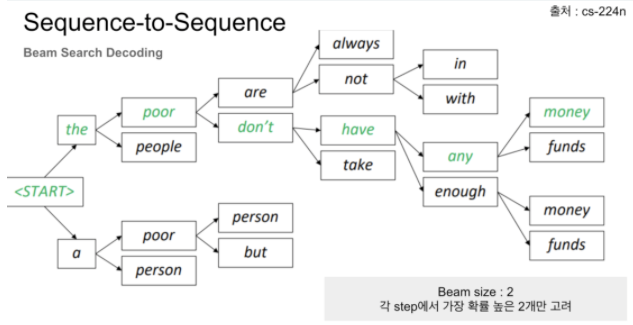

> **Bleu (Blingual Evaluation Understudy) Score**


BLEU 점수는 기계 번역에서 다양한 가능한 번역들이 존재할 때, 번역 품질을 평가하는 방법이다. 이는 기계 번역의 출력과 인간 번역의 참조 문장을 비교해, 얼마나 유사한지 점수를 계산한다. 기계 번역이 단순히 특정 단어를 많이 포함한다고 해서 높은 점수를 받지 않도록, 단어의 등장 횟수를 참조 문장에서의 최대 등장 횟수로 제한하는 수정된 정밀도를 사용한다. BLEU 점수는 unigram, bigram 등 다양한 단어 조합을 평가해 최종 점수를 계산하며, 번역이 너무 짧은 경우 페널티를 부과하는 "brevity penalty"도 적용된다. BLEU는 기계 번역뿐만 아니라 이미지 캡션 생성 같은 텍스트 생성 시스템에도 사용되며, 단일 숫자 평가 지표로 연구와 발전을 가속화했다. BLEU 점수는 텍스트 생성 시스템의 품질을 빠르게 평가할 수 있어, 개발 속도를 높인다.

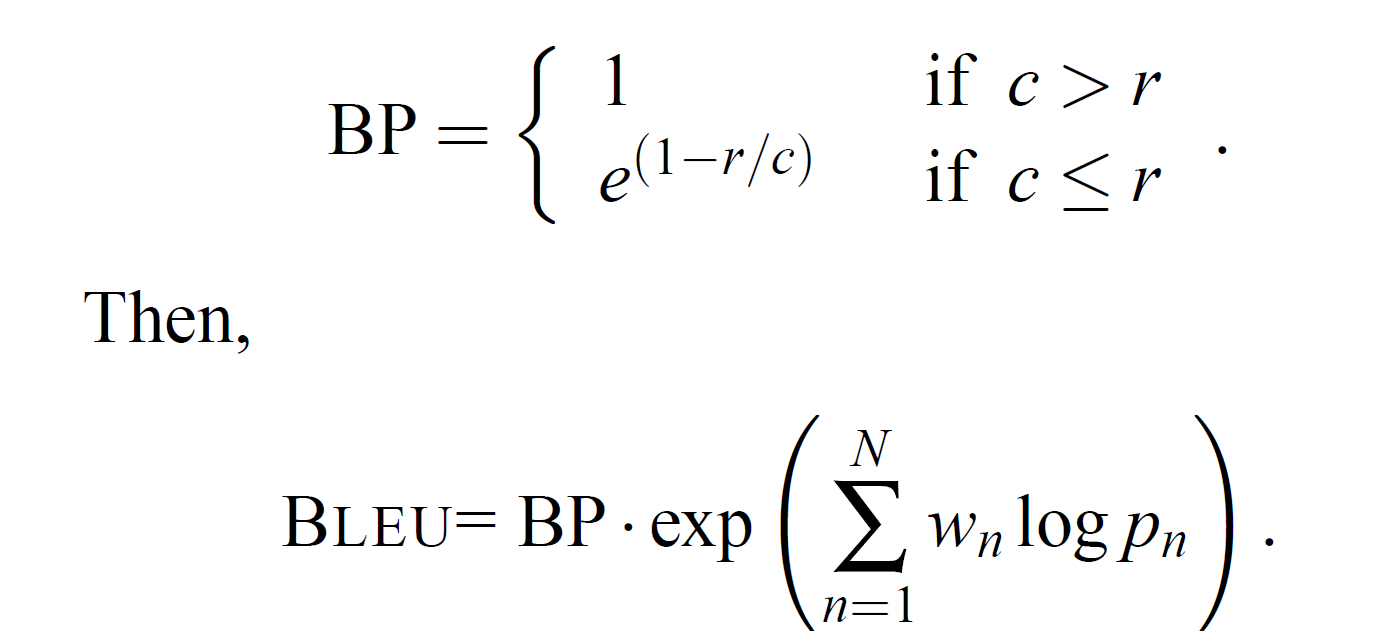

> **Attention Model**

Attention 모델은 긴 문장을 더 잘 처리하기 위해 인코더-디코더 구조를 개선한 방법이다. 기존 구조는 전체 문장을 인코더가 모두 기억해야 하는데, 긴 문장에서는 성능이 저하된다. 그러나 Attention 모델은 각 번역 단계마다 특정 단어에 집중하도록 해 이 문제를 해결한다. Attention 가중치(알파 값)를 통해 각 입력 단어의 중요도를 계산해, 디코더가 번역 시 어느 부분에 집중할지 결정한다. 이 과정에서 RNN은 한 단어씩 번역하며, 각 단계에서 적절한 단어에 집중하도록 도움을 준다. Attention 모델은 특히 긴 문장에서도 성능 저하 없이 번역 품질을 유지할 수 있으며, 이를 통해 번역 시 문장의 특정 부분만 보면서 번역을 진행하게 된다. 이 모델은 기계 번역뿐만 아니라 다양한 분야에서도 활용되고 있으며, 딥러닝의 중요한 혁신 중 하나로 꼽힌다.








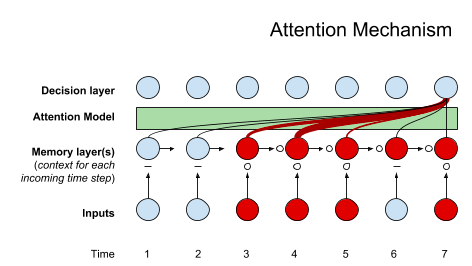

> **Transformer Network Intuition**

Transformer 네트워크는 NLP에서 중요한 혁신으로, RNN, GRU, LSTM과 달리 입력을 병렬로 처리할 수 있는 구조를 갖는다. 이 구조는 Attention과 CNN 방식을 결합하여 복잡한 모델을 더 효율적으로 처리하며, 특히 자기-어텐션(Self-Attention)을 통해 문장 내 각 단어의 풍부한 표현을 병렬로 계산한다. 이후 멀티헤드 어텐션(Multi-Headed Attention)을 사용하여 여러 가지 표현을 생성한다. 이 과정은 번역과 같은 NLP 작업에 매우 효과적이다.

> **Self - Attention**

- Self-attention은 입력 문장 내 각 단어에 대해 문맥을 반영한 표현을 계산하는 메커니즘으로, 문장의 각 단어에 대해 Query(Q), Key(K), Value(V)를 생성한다.
- Query는 해당 단어에 대한 질문을 하고, Key는 다른 단어들과의 유사도를 측정하여 답변을 찾으며, Value는 이를 기반으로 단어의 최종 표현을 계산한다.
- 각 단어에 대해 Q와 K 간의 내적을 계산하여 관련성을 평가하고, Softmax를 적용하여 가중치를 할당한 후, 해당 가중치를 V에 곱해 최종적으로 A라는 표현을 생성한다.
- 예를 들어, "l'Afrique"에 대한 표현 A는 이 단어가 '방문'과 관련이 있는지를 다른 단어들과의 관계를 통해 결정한다.
- 모든 단어에 대해 이러한 과정을 거쳐 문맥에 맞는 표현을 얻고, 이를 통해 단어 간의 상호작용을 반영한 표현을 생성한다.
- Transformer 네트워크에서는 이 과정이 모든 단어에 대해 병렬로 수행된다.
이 방법은 고정된 단어 임베딩 대신, 문맥을 반영한 가변적인 표현을 제공하여 더 풍부하고 유용한 단어 표현을 가능하게 한다.
- Q, K, V는 학습된 행렬을 통해 생성되며, 이 계산 과정은 문장의 모든 단어에 대해 반복된다.
- Attention(Q, K, V)는 계산을 간단히 나타낸 식으로, 문맥을 반영한 단어 표현을 생성하는 핵심 과정이다.
- Self-attention 메커니즘은 Transformer 네트워크의 기본적인 구조로, 문장 전체에서 정보를 효율적으로 처리할 수 있게 한다.
Scaled dot-product attention은 Self-attention의 계산을 안정화하기 위해 내적 값을 스케일링하는 방식을 사용한다.
- Self-attention은 고정된 단어 표현 대신 문맥에 따른 더 풍부한 표현을 생성하여 NLP 작업에서 뛰어난 성능을 발휘한다.






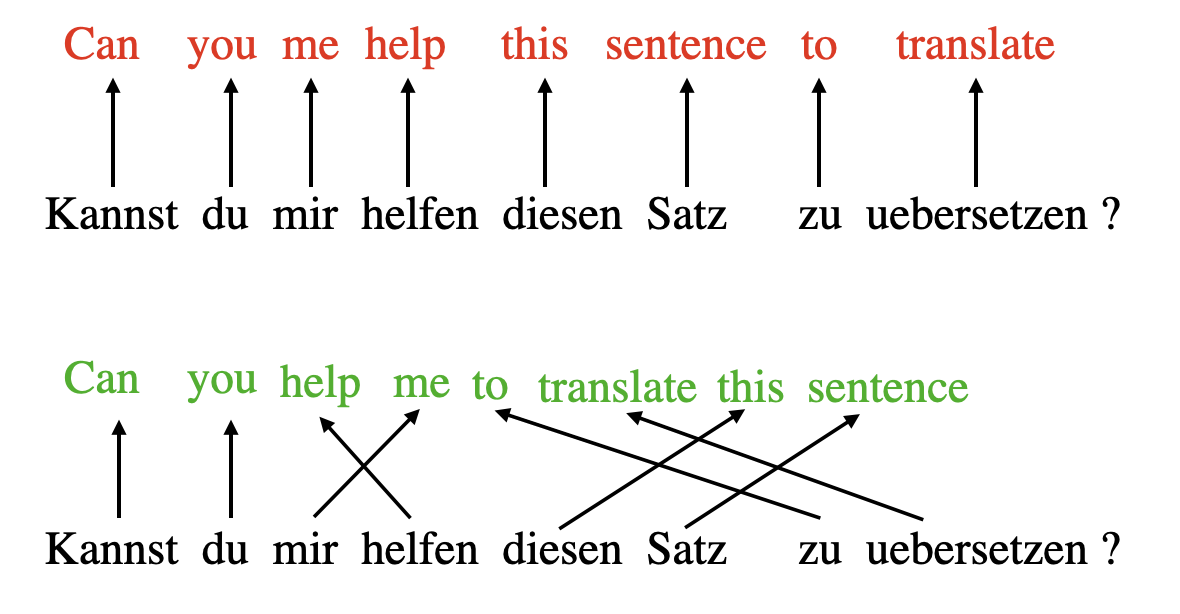

> **Multi-Head Attention**

Multi-head attention은 여러 번의 self-attention 계산을 병렬로 수행하는 방식으로, 각 입력 단어에 대해 Query(Q), Key(K), Value(V) 벡터를 생성한 후 각각 다른 질문을 하는 여러 head를 통해 다양한 정보를 추출한다. 첫 번째 head는 단어 간의 관계를 계산하고, 그 후 여러 head가 각각 다른 질문을 통해 추가적인 정보를 얻으며, 여러 head의 계산 결과는 병합되어 최종적으로 풍부한 문장 표현을 생성한다. 이 과정은 병렬로 처리되어 계산 효율성을 높이며, 최종적으로 각 head의 값을 병합하여 하나의 표현으로 만들고 이를 통해 단어에 대한 더 풍부한 표현을 얻게 된다. Multi-head attention은 문장 내의 각 단어에 대해 더 많은 질문을 던져 더욱 강력한 표현을 학습하게 해주며, 이를 통해 문맥을 더 잘 반영한 문장 표현을 학습할 수 있다.

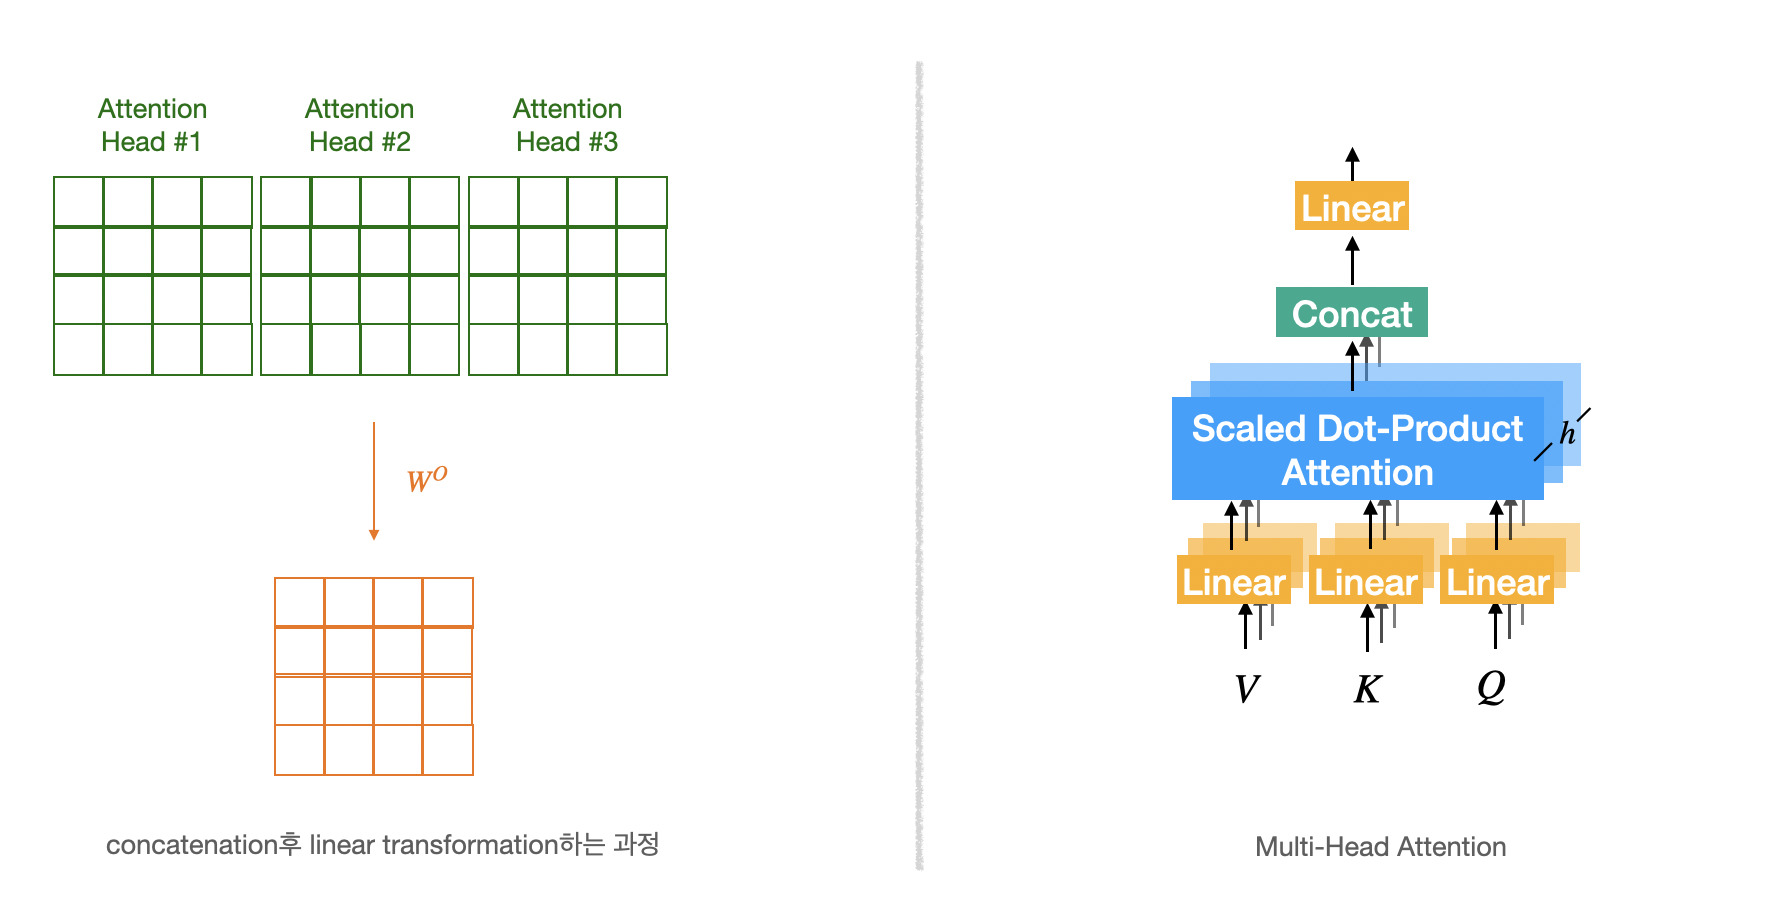

> **Transformer Network**

Transformer 네트워크는 다중 헤드(attention)와 인코더-디코더 구조를 사용하여 문장을 번역한다. 입력 문장은 임베딩되어 다중 헤드 attention 레이어를 통해 처리되며, 이를 n번 반복하여 최종 인코더 출력을 생성한다. 디코더는 인코더 출력을 기반으로 한 단어씩 번역을 생성하며, 시작 문장 토큰을 입력으로 받아 단계별로 번역을 진행한다. 포지셔널 인코딩을 통해 단어의 위치 정보를 반영하고, 이를 네트워크 전반에 전달하기 위해 잔차 연결(residual connections)이 사용된다. 디코더의 출력은 최종적으로 소프트맥스 레이어를 통해 번역을 예측한다. Masked multi-head attention은 학습 시 미래의 단어를 숨기고 테스트 환경을 모방하여 정확도를 높인다.